# CSS324: Homework Assignment 1



## Policy on Generative AI

You may use generative AI tools (e.g., ChatGPT, Gemini) to assist with this assignment. (Note: Gemini is enabled by default in Google Colab) However:

1. You must understand and be able to explain all code you submit. Keep in mind that programming questions may appear in the midterm and final examinations.
2. You must test and verify AI-generated code before turning it in.
3. Include a brief AI usage note (e.g., "Used ChatGPT to suggest how to calculate Manhattan distance").
4. Submitting work you don't understand, or failing to disclose AI use, is considered academic misconduct.

✅ **Write your brief AI usage note here**

- Hamhattan distance calculation
- Suggest something nicer like all three packages, rather than having three boolean for each one the I initially had idea, it can store in 3-bit binary.
- It also suggest that for Question 3 that the given algorithm uses a regular deque with `pop()`, which removes from the right end, making it behave like a stack (LIFO - Last In, First Out). This implements Depth-First Search rather than Breadth-First Search.

## Question 1

Formulate a search problem where a warehouse robot must pick up and deliver multiple packages.

### Problem Description

You are given a **2D grid map** of a warehouse. A **robot courier** must:

1. Start from a designated **start location** (`S`),
2. Pick up all three packages (`A`, `B`, `C`), one at a time in **any order**,
3. Carry all collected packages **simultaneously**,
3. Deliver them all to a **drop-off location** (`G`),
4. Then return to the **start location** (`S`).

**The robot can move up, down, left, or right**, but **not diagonally**. Each move costs 1. The grid may also contain obstacles (`X`) the robot cannot pass through.

Example map:

```
S . . X .
. X A X .
B . . . X
. C . . G
```

- `S` : Start and return point
- `A`, `B`, `C`: Package pickup locations
- `G` : Drop-off point
- `X` : Obstacle
- `.` : Open cell

✅ **Write your answer for Question 1 in this cell**

### State Representation

Describe how you will represent a single state of the problem (e.g., robot's position, packages carried or delivered).

Answer: `state = (pos=(r,c), picked∈{0..7}, delivered∈{false,true})`
- `pos` for robot's position maybe in coordinate `(r,c)` (row, column)
- `picked` to indicate what packages have been picked up use a 3-bit mask over {A,B,C} for exmaple `0b000` for none and `0b111` all picked.
> For this one Give each package a bit (a power of two):
A → 1 (binary 001)
B → 2 (binary 010)
C → 4 (binary 100)
picked is an integer whose binary form tells you which packages you have.
With 3 bits, all possibilities are the numbers 0...7
- `delivered` a boolean indicating whether all picked packages have been dropped at `G` (false before delivery, true after visiting `G` with all three)

___
### Initial State

Specify what the starting state looks like before the robot begins.

Answer: `((r_S, c_S), picked=0b000, delivered=false)`
- Robot starts at `S`
- No packages picked (`0b000`)
- Nothing delivered (`delivered = false`)


___
### Goal Test

Explain the condition that must be satisfied for the robot to have completed its task.

Answer: `pos == S && delivered == true`
- Robot is back at `S`, and
- All packages have been delivered (this means, the robot has previously reached `G` while carrying all three)

___
### Actions

List the possible actions the robot can take from any given state.

Answer:
Primitive actions are movements to adjacent open cells (**cost = 1 each**):
- Movement: `Up`, `Down`, `Left`, `Right`
- Subject to: inside bounds and not an obstacle X

## Question 2

Suppose that we decide to represent a state of the 8-Puzzle problem using a list of coordinates in (row, column) format for the blank and each numbered tile. Thus, a state is a nested list where each inner list denotes a coordinate of a tile, starting with the blank followed by the numbered tiles in order.

Example state:

```
7 2 4
5 0 6   →  [[1,1], [2,2], [0,1], [2,1], [0,2], [1,0], [1,2], [0,0], [2,0]]
8 3 1
```

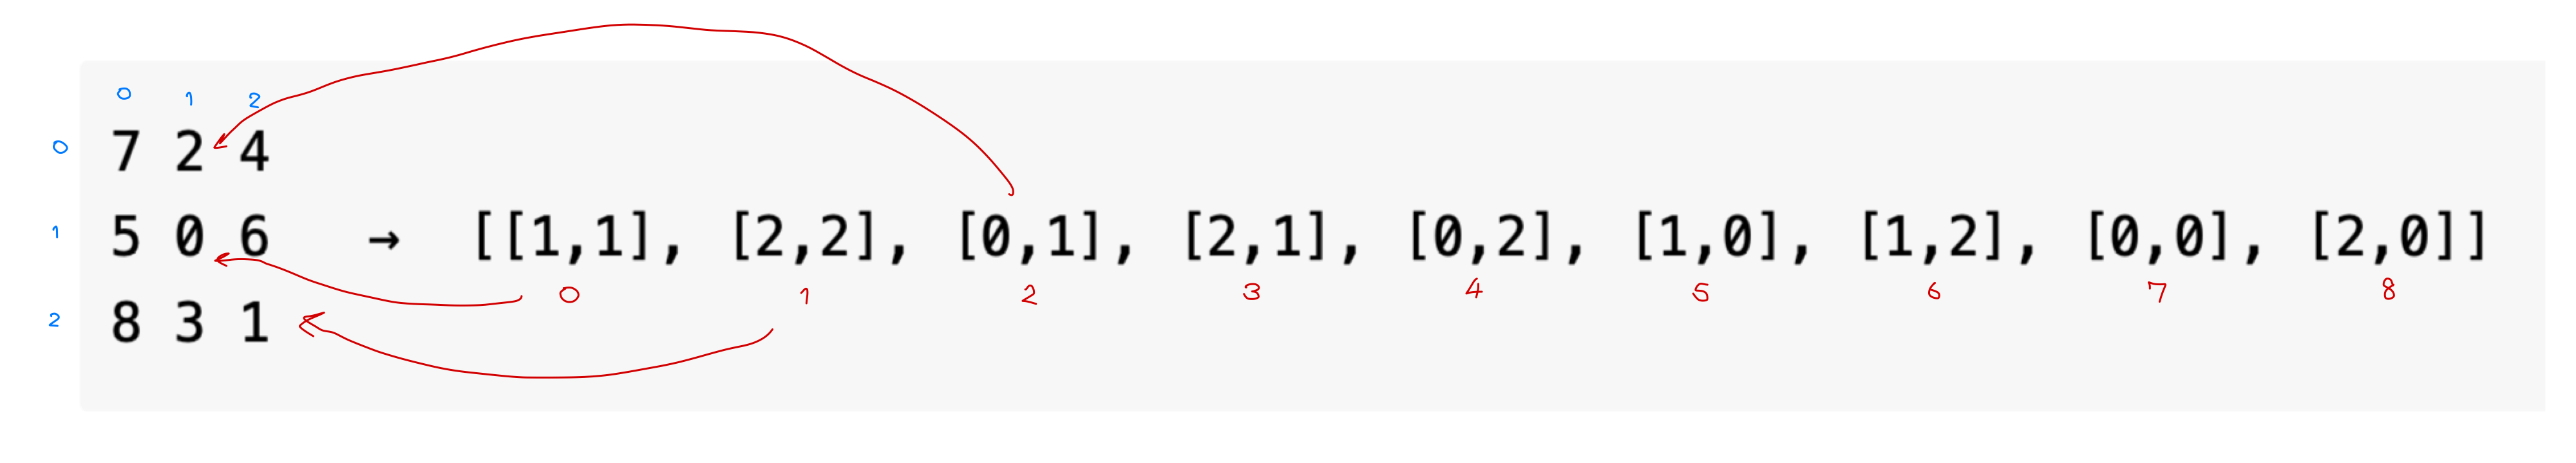

### Question 2.1

Complete the following code cell to implement the search formulation of the 8-Puzzle. The goal is to be able to efficiently use your implementation with the A* Graph Search below.

In [ ]:
# ✅ Edit this cell for Question 2.1

from typing import List, Tuple, Any

class State:
    def __init__(self):
        pass
    def is_goal(self) -> bool:
        """
        Check if the current state is a goal state.
        This method should be overridden in subclasses.
        """
        raise NotImplementedError("Subclasses must implement this method.")
    def successors(self) -> List[Tuple["State", int]]:
        """
        Generate the successors of the current state.
        This method should be overridden in subclasses.
        """
        raise NotImplementedError("Subclasses must implement this method.")
    def __repr__(self) -> str:
        return "State"
    def __eq__(self, other: Any) -> bool:
        if not isinstance(other, State):
            return False
        return True
    def __hash__(self) -> int:
        return hash(self.__repr__())

class EightPuzzleState:
    def __init__(self, coordinates: List[List[int]]):
        self.coordinates = coordinates

    def is_goal(self) -> bool:
        goal_coordinates = [[2,2], [0,0], [0,1], [0,2], [1,0], [1,1], [1,2], [2,0], [2,1]]
        return self.coordinates == goal_coordinates

    def __repr__(self) -> str:
        board = [[0,0,0],[0,0,0],[0,0,0]]
        for i, (row, col) in enumerate(self.coordinates):
            board[row][col] = i
        return '\n'.join([' '.join(map(str, row)) for row in board])

    def __eq__(self, other: Any) -> bool:
        if not isinstance(other, EightPuzzleState):
            return False
        return self.coordinates == other.coordinates

    def __hash__(self) -> int:
        return hash(self.__repr__())

    def successors(self) -> List[Tuple["EightPuzzleState", int]]:
        """
        Generate all valid successor states by moving the blank tile (index 0).
        Returns list of (new_state, cost) tuples where cost is always 1.
        """

        successors_list = []
        blank_row, blank_col = self.coordinates[0]

        moves = [(-1, 0), (1, 0), (0, -1), (0, 1)]

        for dr, dc in moves:
            new_row = blank_row + dr
            new_col = blank_col + dc

            # Check if the new position is within bounds
            if 0 <= new_row <= 2 and 0 <= new_col <= 2:
                # Find which tile is at the new position
                tile_at_new_pos = None
                for i, (row, col) in enumerate(self.coordinates):
                    if row == new_row and col == new_col:
                        tile_at_new_pos = i
                        break

                # Create new state by swapping blank with the tile at new position
                new_coordinates = [coord[:] for coord in self.coordinates]  # Deep copy
                new_coordinates[0] = [new_row, new_col]  # Move blank to new position
                new_coordinates[tile_at_new_pos] = [blank_row, blank_col]  # Move tile to blank's old position

                # Create new state and add to successors with cost 1
                new_state = EightPuzzleState(new_coordinates)
                successors_list.append((new_state, 1))

        return successors_list

In [ ]:
# 🚫 Do not edit this cell. It is for testing your implementation

initial_state = EightPuzzleState([[1,1], [2,2], [0,1], [2,1], [0,2], [1,0], [1,2], [0,0], [2,0]])

print("Initial state")
print(initial_state)
print("=============")
print("Successors")
for child_state, step_cost in initial_state.successors():
    print(child_state)
    print()

Initial state
7 2 4
5 0 6
8 3 1
Successors
7 0 4
5 2 6
8 3 1

7 2 4
5 3 6
8 0 1

7 2 4
0 5 6
8 3 1

7 2 4
5 6 0
8 3 1



### Question 2.2

Complete the following `h_sum_manhattan` function that returns the **sum of Manhattan distances of the numbered tiles** from their current positions to their goal positions (ignore the blank `0`).

In [ ]:
# ✅ Edit this cell for Question 2.2

def h_sum_manhattan(state: EightPuzzleState):
    goal_positions = {
        1: (0, 0), 2: (0, 1), 3: (0, 2),
        4: (1, 0), 5: (1, 1), 6: (1, 2),
        7: (2, 0), 8: (2, 1)
    }

    total_manhattan = 0

    # Calculate Manhattan distance for each numbered tile (skip blank at index 0)
    for tile_num in range(1, 9):  # Tiles 1 through 8
        current_row, current_col = state.coordinates[tile_num]
        goal_row, goal_col = goal_positions[tile_num]

        manhattan_dist = abs(current_row - goal_row) + abs(current_col - goal_col)
        total_manhattan += manhattan_dist

    return total_manhattan

In [ ]:
# 🚫 Do not edit this cell. It is for testing your implementation

print(f"Heuristic value of the initial state = {h_sum_manhattan(initial_state)}")

Heuristic value of the initial state = 14


In [ ]:
# 🚫 Do not edit this cell.

from heapq import heappush, heappop, heapify
from typing import Tuple, Callable

class Node:
    def __init__(self, state: "State", parent: "Node", path_cost: int, depth: int) -> None:
        self.state = state
        self.parent = parent
        self.path_cost = path_cost
        self.depth = depth

    def __lt__(self, other: "Node") -> bool:
        return self.path_cost < other.path_cost

def find_state(state: State, frontier: List[Tuple[int, Node]]) -> Tuple[int, Node]:
    for i, (_, node) in enumerate(frontier):
        if node.state == state:
            return i, node
    return -1, None

def a_star_graph_search(initial_state: State, h: Callable) -> Tuple[Node, int]:
    initial_node = Node(initial_state, None, 0, 0)
    f_value = 0 + h(initial_state)
    frontier = [(f_value, initial_node)]
    heapify(frontier)

    explored = set()
    n_visits = 0

    print("Searching...")
    while frontier:
        n_visits += 1
        if n_visits % 1000 == 0:
            print(f"\tn_visits = {n_visits:5d}")
        f_value, node = heappop(frontier)
        explored.add(node.state)
        if node.state.is_goal():
            print(f"\tn_visits = {n_visits:5d}")
            print(f"Goal found at depth {node.depth} with path cost {node.path_cost}")
            return node, n_visits
        else:
            for child_state, step_cost in node.state.successors():
                if child_state not in explored:
                    idx, existing_node = find_state(child_state, frontier)
                    child_node = Node(child_state, node, node.path_cost + step_cost,  node.depth + 1)
                    f_value = child_node.path_cost + h(child_state)
                    if existing_node is None:
                        heappush(frontier, (f_value, child_node))
                    elif child_node.path_cost < existing_node.path_cost:
                        frontier[idx] = (f_value, child_node)
                        heapify(frontier)
    return None, n_visits


In [ ]:
# 🚫 Do not edit this cell. It is for testing your implementation

goal_node, n_visits = a_star_graph_search(initial_state, h_sum_manhattan)
if goal_node:
    path = []
    node = goal_node
    while node:
        path.append(node.state)
        node = node.parent
    path.reverse()
    print(f"Solution:")
    for i, state in enumerate(path):
        print(f"Step {i}:")
        print(state)
        print()

Searching...
	n_visits =   283
Goal found at depth 20 with path cost 20
Solution:
Step 0:
7 2 4
5 0 6
8 3 1

Step 1:
7 2 4
5 3 6
8 0 1

Step 2:
7 2 4
5 3 6
8 1 0

Step 3:
7 2 4
5 3 0
8 1 6

Step 4:
7 2 4
5 0 3
8 1 6

Step 5:
7 2 4
0 5 3
8 1 6

Step 6:
0 2 4
7 5 3
8 1 6

Step 7:
2 0 4
7 5 3
8 1 6

Step 8:
2 4 0
7 5 3
8 1 6

Step 9:
2 4 3
7 5 0
8 1 6

Step 10:
2 4 3
7 0 5
8 1 6

Step 11:
2 4 3
7 1 5
8 0 6

Step 12:
2 4 3
7 1 5
0 8 6

Step 13:
2 4 3
0 1 5
7 8 6

Step 14:
2 4 3
1 0 5
7 8 6

Step 15:
2 0 3
1 4 5
7 8 6

Step 16:
0 2 3
1 4 5
7 8 6

Step 17:
1 2 3
0 4 5
7 8 6

Step 18:
1 2 3
4 0 5
7 8 6

Step 19:
1 2 3
4 5 0
7 8 6

Step 20:
1 2 3
4 5 6
7 8 0



## Question 3

Complete the following code cell to implement the Depth-Limited Graph Search. Your implementation must utilize a `deque` as a stack for the frontier.

In [ ]:
from collections import deque

def depth_limited_graph_search(initial_state: State, d: int) -> Tuple[Node, int]:
    initial_node = Node(initial_state, None, 0, 0)
    frontier = deque([initial_node])

    explored = set()
    n_visits = 0

    print("Searching...")
    while frontier:
        n_visits += 1
        if n_visits % 1000 == 0:
            print(f"\tn_visits = {n_visits:5d}")
        # node = frontier.pop()
        node = frontier.popleft()
        explored.add(node.state)
        if node.state.is_goal():
            print(f"\tn_visits = {n_visits:5d}")
            print(f"Goal found at depth {node.depth} with path cost {node.path_cost}")
            return node, n_visits
        elif node.depth < d:
            for child_state, step_cost in node.state.successors():
                if child_state not in explored:
                    child_node = Node(child_state, node, node.path_cost + step_cost, node.depth + 1)
                    frontier.append(child_node)
    return None, n_visits

In [ ]:
# 🚫 Do not edit this cell. It is for testing your implementation

goal_node, n_visits = depth_limited_graph_search(initial_state, 20)
if goal_node:
    path = []
    node = goal_node
    while node:
        path.append(node.state)
        node = node.parent
    path.reverse()
    print(f"Solution:")
    for i, state in enumerate(path):
        print(f"Step {i}:")
        print(state)
        print()

Searching...
	n_visits =  1000
	n_visits =  2000
	n_visits =  3000
	n_visits =  4000
	n_visits =  5000
	n_visits =  6000
	n_visits =  7000
	n_visits =  8000
	n_visits =  9000
	n_visits = 10000
	n_visits = 11000
	n_visits = 12000
	n_visits = 13000
	n_visits = 14000
	n_visits = 15000
	n_visits = 16000
	n_visits = 17000
	n_visits = 18000
	n_visits = 19000
	n_visits = 20000
	n_visits = 21000
	n_visits = 22000
	n_visits = 23000
	n_visits = 24000
	n_visits = 25000
	n_visits = 26000
	n_visits = 27000
	n_visits = 28000
	n_visits = 29000
	n_visits = 30000
	n_visits = 31000
	n_visits = 32000
	n_visits = 33000
	n_visits = 34000
	n_visits = 35000
	n_visits = 36000
	n_visits = 37000
	n_visits = 38000
	n_visits = 39000
	n_visits = 40000
	n_visits = 41000
	n_visits = 42000
	n_visits = 43000
	n_visits = 44000
	n_visits = 45000
	n_visits = 46000
	n_visits = 47000
	n_visits = 48000
	n_visits = 49000
	n_visits = 50000
	n_visits = 51000
	n_visits = 52000
	n_visits = 53000
	n_visits = 54000
	n_visits = 550